# PS6 

## Laurence Warner 

### 1 

#### a 

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import export_graphviz

import graphviz

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
biden = pd.read_csv("biden.csv")

No null values

Split data into predictors and predicted variables.

In [5]:
y = biden["biden"]

In [6]:
X = biden.drop("biden", axis = 1)

Split those into training and test sets.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

Make tree:

In [9]:
biden_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=5)

In [10]:
biden_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Plot the tree

In [26]:
biden_viz = export_graphviz(
    biden_tree,
    out_file=None,
    rounded=True,
    filled=True,
    feature_names=X.columns
)

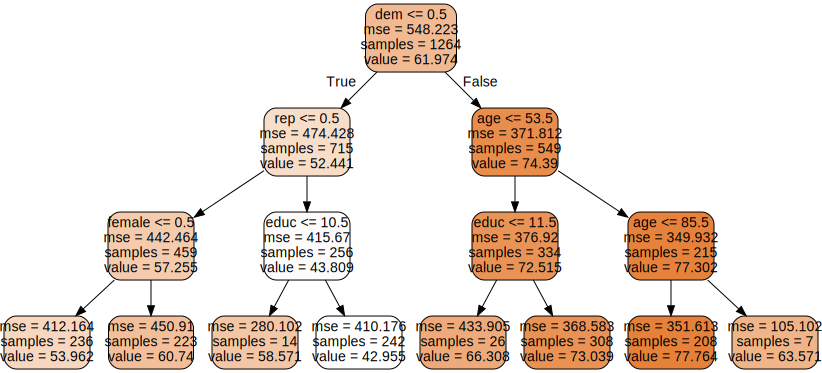

In [27]:
graph = graphviz.Source(biden_viz)
graph

Democrats (RHS of first split) generally have warmer feeling! 

Test MSE:

In [31]:
y_pred = biden_tree.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print("test MSE is:",test_mse)

test MSE is: 392.176867513


#### b 

Assume tree complexity refers to max_depth rather than min_samples_leaf.

In [59]:
for depth in range(1,20):
    biden_tree_depth = DecisionTreeRegressor(min_samples_leaf=5, max_depth=depth)
    biden_tree_depth.fit(X_train, y_train)
    y_pred_depth = biden_tree_depth.predict(X_test)
    test_mse_depth = mean_squared_error(y_test, y_pred_depth)
    
    print("max_depth:", depth, "MSE:", test_mse_depth)

max_depth: 1 MSE: 441.384142638
max_depth: 2 MSE: 385.912037886
max_depth: 3 MSE: 392.176867513
max_depth: 4 MSE: 395.292969547
max_depth: 5 MSE: 402.605941626
max_depth: 6 MSE: 417.653577651
max_depth: 7 MSE: 436.823645285
max_depth: 8 MSE: 455.586626213
max_depth: 9 MSE: 491.58337183
max_depth: 10 MSE: 501.90494565
max_depth: 11 MSE: 503.736441015
max_depth: 12 MSE: 506.707052961
max_depth: 13 MSE: 511.719415124
max_depth: 14 MSE: 513.230919569
max_depth: 15 MSE: 513.230919569
max_depth: 16 MSE: 513.327604652
max_depth: 17 MSE: 513.230919569
max_depth: 18 MSE: 513.230919569
max_depth: 19 MSE: 513.230919569


Minimum MSE occurs when max_depth = 2

In [36]:
biden_tree_two = DecisionTreeRegressor(max_depth=2, min_samples_leaf=5)
biden_tree_two.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [37]:
biden_viz_two = export_graphviz(
    biden_tree_two,
    out_file=None,
    rounded=True,
    filled=True,
    feature_names=X.columns
)

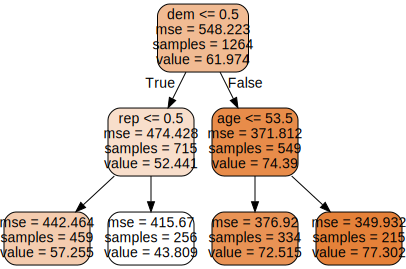

In [38]:
graph = graphviz.Source(biden_viz_two)
graph

Democrats warmer. Of non-dems, republicans are super cold (average 43).

Test MSE improved from 392 to 385.

#### c 

In [45]:
biden_bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100, max_samples=100, oob_score=True, random_state=1)

In [46]:
biden_bag.fit(X, y)

biden_bag.score(X, y)
y_pred_bag = biden_bag.oob_prediction_
mse_bag = mean_squared_error(y, y_pred_bag)
print('MSE=', mse_bag)

MSE= 406.064751302


Don't understand variable importance measures.

#### d 

In [57]:
def random_forest(m):
    '''
    Given m, prints MSE. 
    '''
    biden_tree_forest = RandomForestRegressor(max_features = m, n_estimators=53, oob_score=True, random_state=1)
    
    biden_tree_forest.fit(X, y)
    y_pred_forest = biden_tree_forest.oob_prediction_
    mse_forest = mean_squared_error(y, y_pred_forest)
    print('m =', m, 'MSE=', mse_forest)

Again, don't understand variable importance.

In [58]:
for i in range(1, 4):
    random_forest(i)

m = 1 MSE= 550.059578237
m = 2 MSE= 548.895925745
m = 3 MSE= 548.699776507


The more variables considered, the lower the error rate.